In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import pandas as pd
%matplotlib inline

#fai vedere search con txt4

In [2]:
import pyram as pr
pr.cwd('example_data')
pr.charge_lib('short')

Welcome to pyram: your Raman analysis library!
Charging pure spectra library, needs around a minute ....
Done. Good work!


txt0  ->  Sample01_A_10x6s_633nm_G1200_F100__Ox100LWD.txt
txt1  ->  Sample01_B_10x30s_633nm_G1200_F1__Ox100LWD.txt
txt2  ->  Sample01_C_10x20s_633nm_G1200_F10__Ox100LWD.txt
txt3  ->  Sample01_D_6x4s_633nm_G1200_F100__Ox10.txt
txt4  ->  Sample01_E_6x4s_633nm_G1200_F100__Ox100LWD.txt
txt5  ->  Sample01_F_10x5s_633nm_G1200_F0_1__Ox100LWD.txt
txt6  ->  Sample01_G_6x10s_633nm_G1200_F10__Ox100LWD.txt
txt7  ->  Sample01_H_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt8  ->  Sample01_I_10x10s_633nm_G1200_F25__Ox100LWD.txt
txt9  ->  Sample01_J_10x5s_633nm_G1200_F10__Ox100LWD.txt
txt10  ->  Sample01_K_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt11  ->  Si_calibration_A_60x1s_633nmnm_G1200_F100__Ox100.txt
sum(Y-XW) =  -18061855.99024269
message =  Optimization terminated successfully.
# of iter =  1634


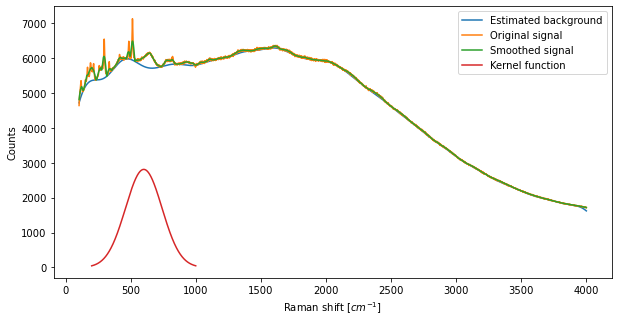

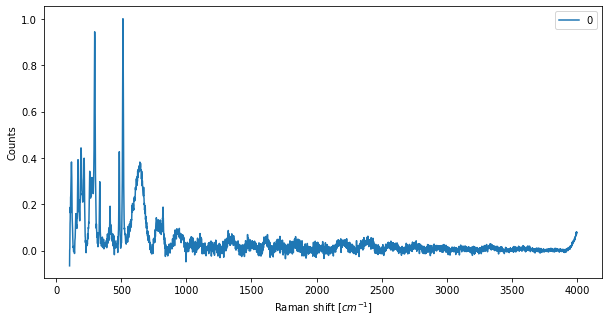

In [34]:
pr.set_alias()
S = pr.type2spectra('txt8')
S=pr.interpol(S)
S_nobkg= pr.bkg_subtraction(S,sigma=140,plot=True)
pr.plot(S_nobkg)

In [31]:
pr.search(S_nobkg,5,pre=False,first=10)

  alias          name     match
0  sch0        Albite  0.798893
1  sch1    Microcline  0.662354
2  sch2    Orthoclase  0.604300
3  sch3  Chalcopyrite  0.568547
4  sch4    Nontronite  0.533077
5  sch5       Zoisite  0.448844
6  sch6   Armalcolite  0.433287
7  sch7  Arsenopyrite  0.422862
8  sch8    Phlogopite  0.394224
9  sch9       Amesite  0.389935


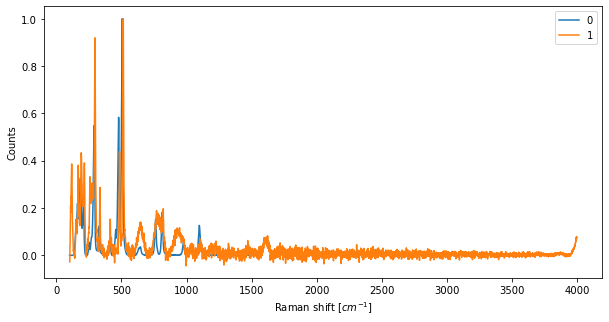

In [32]:
pr.plot(['sch0',S_nobkg])

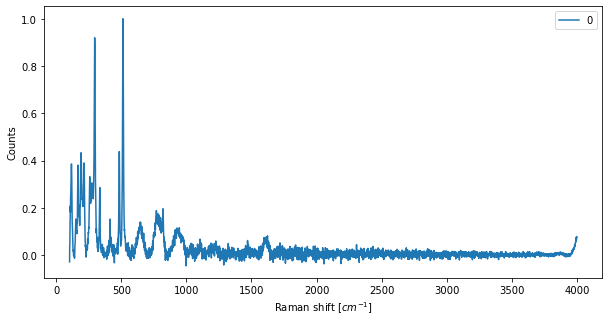

In [7]:
pr.plot(S_nobkg)

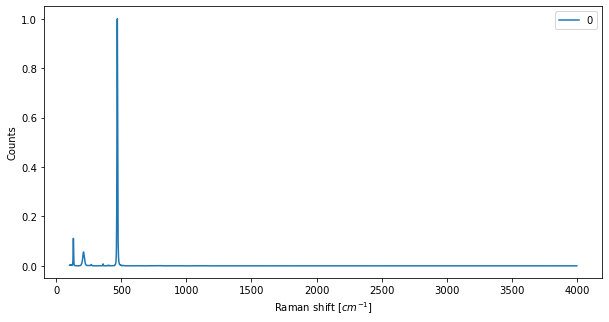

In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-20*x))

from scipy.signal import savgol_filter
P = S_nobkg.copy()

#P[1] = savgol_filter(P[1],21,2)
P[1] = np.where(P[1]>0, P[1], P[1]*0)

P[1] /= np.max(P[1])
#P[1] = sigmoid(P[1])-0.5
P[1]=P[1]**(2)


pr.plot([P])

